<img style="margin: 0 auto;" src="https://desafiolatam.com/assets/home/logo-academia-bla-790873cdf66b0e681dfbe640ace8a602f5330bec301c409744c358330e823ae3.png">

In [39]:
#Importar librerias

import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import missingno

#Ignorar Avisos
import warnings
warnings.filterwarnings("ignore")

### Objetivo
* Implementar los contenidos aprendidos a lo largo de las 8 unidades para resolver dos problemas de carácter obligatorio.
* Se deben desarrollar dos desafíos aplicando lo aprendido en el módulo Fundamentos de DataScience.
* Ambos desafíos presentarán un enunciado a solucionar, así como una descripción de los datosdisponibles a utilizar.
* Cada una de las respuestas deben considerar los requerimientos mínimos y buenas prácticasdetalladas a continuación.

### Consideraciones Generales
La prueba debe desarrollarse en consideración a los siguientes puntos:
* Una sección llamada Preliminares donde se realiza la descripción del problema y objetivos, asícomo explicar cómo implementarán su solución (debe considerar qué criterios de optimización ymétricas de desempeño).
* Una sección llamada Aspectos computacionales donde se describirán las librerías y módulos a implementar, así como las funciones generadas y su objetivo.
* Una sección llamada Descripción donde se generará un análisis descriptivo considerando el tipo de variables (desde el punto de vista estadístico así como computacional). Esta sección debe considerar medidas univariadas/ frecuencias, datos perdidos y gráficos distributivos sobre las variables a analizar. A partir de ésta se debe clarificar la estrategia de preprocesamiento (datos perdidos, recodificaciones).
* Una sección llamada Modelación descriptiva, que buscará definir cuáles son los principales determinantes del objeto de estudio. En base a esta sección se podrá construír o depurar el modelo predictivo.
* Una sección llamada Modelación predictiva, donde se implementará una solución analítica que aumente las métricas de desempeño. Se solicitan por lo menos 3 modelos predictivos, donde deberán reportar las principales métricas. Cada modelo predictivo debe tener una reseña sobre el por qué se diseño de esa forma.

### Hito 1: Sesión Presencial 1, Unidad 7
Completar el punto de Preliminares, así como Aspectos computacionales.
* Elementos a considerar en éste hito:
    * Los dos enunciados deben estar clarificados, considerando el tipo de problema a resolver (regresión o clasificación). Para cada uno de los enunciados y su problema identificado, se debe justificar el uso de métricas para medir el desempeño del problema. (3 puntos)
    * Se debe considerar el uso de las librerías asociadas para la ingesta, preprocesamiento, visualización y modelación, así como métricas de evaluación. (1 punto)
    * Se debe detallar y considerar el proceso de preprocesamiento y recodificación de datos. (1punto)
* Entregable: Dos notebooks (uno por enunciado) con todos los puntos detallados.

### Desafío 1: Determinantes del ingreso
#### Enunciado
Usted trabaja para un  organismo no  gubernamental que está interesado en  las  dinámicas socioeconómicas que determinan la desigualdad de ingreso y la erradicación de la pobreza extrema,enmarcado dentro de los objetivos del desarrollo del nuevo milenio del Programa de las NacionesUnidas para el  Desarrollo. Le  encomiendan el  desarrollo de  un  modelo predictivo  sobre la probabilidad que un individuo presente salarios por sobre o bajo los 50.000 dólares anuales, en basea una serie de atributos sociodemográficos.
#### Aspectos adicionales a considerar
* La base de datos contiene los valores perdidos como '?'. Deberá transformarlos para poder trabajar de forma adecuada.


In [53]:
df = pd.read_csv('income-db.csv')
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [124]:
print(df.shape)

(48842, 15)


In [125]:
df_subset = df.replace('?', np.nan)

In [126]:
df_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
age                48842 non-null int64
workclass          46043 non-null object
fnlwgt             48842 non-null int64
education          48842 non-null object
educational-num    48842 non-null int64
marital-status     48842 non-null object
occupation         46033 non-null object
relationship       48842 non-null object
race               48842 non-null object
gender             48842 non-null object
capital-gain       48842 non-null int64
capital-loss       48842 non-null int64
hours-per-week     48842 non-null int64
native-country     47985 non-null object
income             48842 non-null object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


Segun lo reportado por el método Info del DataFrame, las columnas `workclass`, `occupation`, y `native-country`
tienen valores N/A

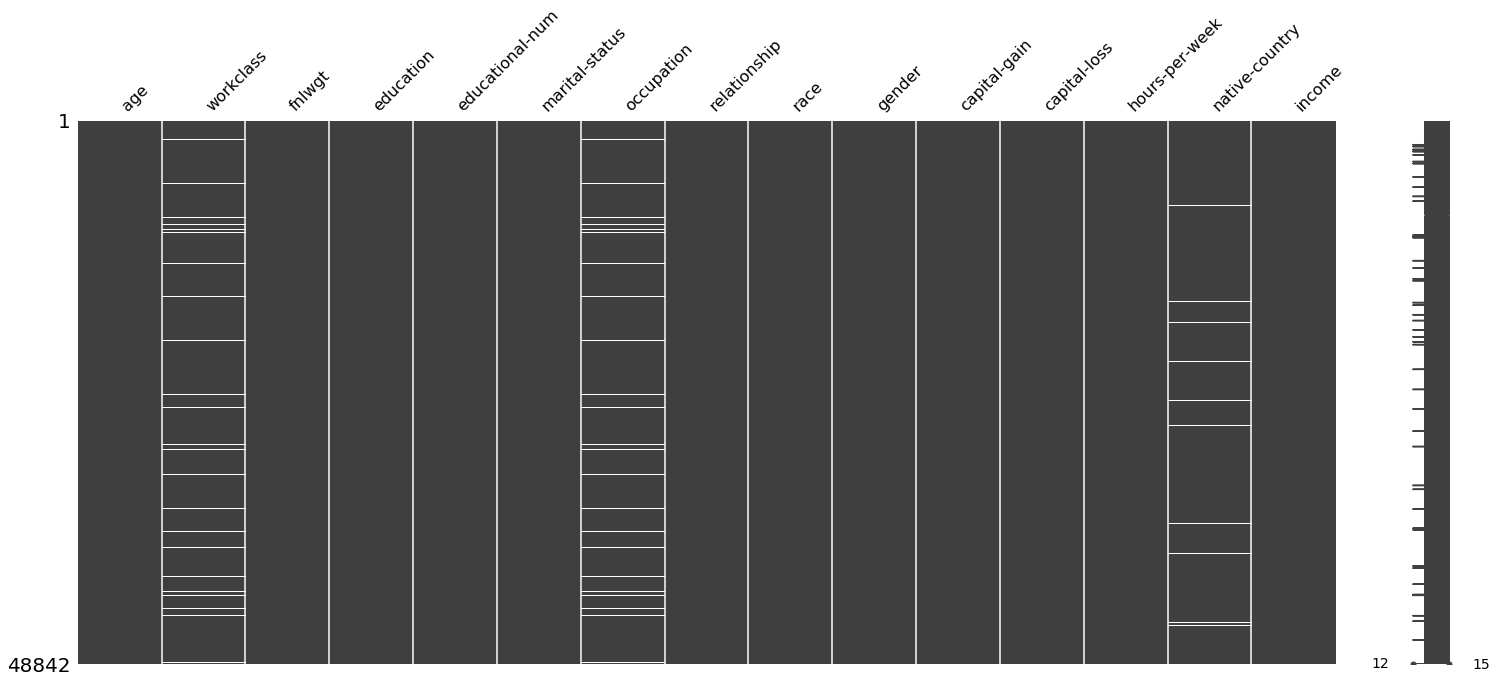

In [127]:
missingno.matrix(df_subset)

In [128]:
non_nan_workclass_rows = len(df_subset[df_subset['workclass'].isna()])
total_rows = len(df_subset)
print(f"El porcentaje de datos perdidos de la variable Workclass es: {round(non_nan_workclass_rows/total_rows * 100, 2)}%")

El porcentaje de datos perdidos de la variable Workclass es: 5.73%


In [129]:
non_nan_occupation_rows = len(df_subset[df_subset['occupation'].isna()])
print(f"El porcentaje de datos perdidos de la variable Occupation es: {round(non_nan_occupation_rows/total_rows * 100, 2)}%")

El porcentaje de datos perdidos de la variable Occupation es: 5.75%


In [130]:
non_nan_native_country_rows = len(df_subset[df_subset['native-country'].isna()])
print(f"El porcentaje de datos perdidos de la variable Native Country es: {round(non_nan_native_country_rows/total_rows * 100, 2)}%")

El porcentaje de datos perdidos de la variable Native Country es: 1.75%


In [131]:
dropped_df = df_subset.dropna()
print(f"El porcentaje de datos perdidos si eliminamos todos los N/A es de: {round(len(dropped_df)/len(df_subset)*100, 2)}%")

El porcentaje de datos perdidos si eliminamos todos los N/A es de: 92.59%


#####  Como los datos perdidos representan un poco más del 7% de la muestra consideramos que eliminarlos seria un error, por lo que optamos por dejarlos como valores nulos para despues poder seguir usando la serie aunque esta tenga un valor nulo que puede ser dropeado

* Desde la organización le sugieren que debe recodificar las siguientes variables acorde a las siguientes nomenclaturas:
    * occupation debe recodificarse como collars siguiendo una nomenclatura similar a:
        * white-collar $\leftarrow$ Prof-specialty, Exec-managerial, Adm-clerical, Sales,Tech-support.
        * blue-collar $\leftarrow$ Craft-repair, Machine-op-inspct, Transport-moving,Handlers-cleaners, Farming-fishing, Protective-serv, Priv-house-serv.
        * others $\leftarrow$ Other-service, Armed-Forces.
    * workclass debe recodificarse como workclass_recod siguiendo una nomenclatura similar a:
        * federal-gov $\leftarrow$ Federal-gov.
        * state-level-gov $\leftarrow$ State-gov, Local-gov.
        * self-employed $\leftarrow$ Self-emp-inc, Self-emp-not-inc
        * unemployed $\leftarrow$ Never-worked, Without-pay.
    * education debe recodificarse como educ_recod siguiendo una nomenclatura similar a:
        * preschool$\leftarrow$ Preschool
        * elementary-school$\leftarrow$ 1st-4th, 5th-6th
        * high-school$\leftarrow$ 7th-8th, 9th, 10th,11th, 12th, HS-grad
        * college$\leftarrow$ Assoc-voc, Assoc-acdm, Some-college
        * university$\leftarrow$ Bachelors, Masters, Prof-school, Doctorate
    * marital-status  debe recodificarse como civstatus  siguiendo una  nomenclaturasimilar a:
        * married$\leftarrow$ Married-civ-spouse, Married-spouse-absent, Married-AF-spouse
        * divorced$\leftarrow$ Divorced
        * separated$\leftarrow$ Separated
        * widowed$\leftarrow$ Widowed
    * native-country debe recodificarse como region donde cada país debe asignarse a uno de los 5 continentes
    * income debe recodificarse de forma binaria.

### Recodificacion de Occupation:

In [132]:
df_subset['occupation'].value_counts()

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

In [133]:
df_subset['occupation'] = df_subset['occupation'].replace([
    #white-collar
    'Prof-specialty', 'Exec-managerial', 'Adm-clerical','Sales','Tech-support',
    #blue-collar
    'Craft-repair','Machine-op-inspct','Transport-moving','Handlers-cleaners', 'Farming-fishing','Protective-serv','Priv-house-serv',
    #others
    'Other-service', 'Armed-Forces'
],
[   #white-collar
    'white-collar','white-collar','white-collar','white-collar', 'white-collar',
    #blue-collar
    'blue-collar', 'blue-collar', 'blue-collar','blue-collar', 'blue-collar', 'blue-collar', 'blue-collar',
    #others
    'others', 'others'
])

In [134]:
df_subset['occupation'].value_counts()

white-collar    24819
blue-collar     16276
others           4938
Name: occupation, dtype: int64

### Recodificacion de Workclass:

In [135]:
df_subset['workclass'].value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [136]:
df_subset['workclass'] = df_subset['workclass'].replace([
    'Federal-gov',
    'State-gov', 'Local-gov',
    'Self-emp-inc', 'Self-emp-not-inc',
    'Never-worked', 'Without-pay'
],
[
    'federal-gov','state-level-gov', 'state-level-gov',
    'self-employed', 'self-employed', 'unemployed', 'unemployed'
])

In [137]:
df_subset['workclass'].value_counts()

Private            33906
self-employed       5557
state-level-gov     5117
federal-gov         1432
unemployed            31
Name: workclass, dtype: int64

### Recodificacion de Education:

In [138]:
df_subset['education'].value_counts()

HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64

In [139]:
df_subset['education'] = df_subset['education'].replace([
    'Preschool',
    '1st-4th', '5th-6th',
    '7th-8th', '9th', '10th','11th', '12th', 'HS-grad',
    'Assoc-voc', 'Assoc-acdm', 'Some-college',
    'Bachelors', 'Masters', 'Prof-school', 'Doctorate'
],
[
    'preschool', 
    'elementary-school', 'elementary-school',
    'high-school', 'high-school', 'high-school','high-school', 'high-school', 'high-school',
    'college', 'college', 'college',
    'university', 'university', 'university', 'university'
])

In [140]:
df_subset['education'].value_counts()

high-school          21353
college              14540
university           12110
elementary-school      756
preschool               83
Name: education, dtype: int64

### Recodificacion de Marital Status:

In [141]:
df_subset['marital-status'].value_counts()

Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: marital-status, dtype: int64

In [142]:
df_subset['marital-status'] = df_subset['marital-status'].replace([
    'Married-civ-spouse', 'Married-spouse-absent', 'Married-AF-spouse',
    'Divorced',
    'Separated',
    'Widowed'
],
[
    'married','married', 'married',
    'divorced',
    'separated',
    'widowed'
])

In [143]:
df_subset['marital-status'].value_counts()

married          23044
Never-married    16117
divorced          6633
separated         1530
widowed           1518
Name: marital-status, dtype: int64

### Recodificacion de Native Country:

In [144]:
df_subset['native-country'].value_counts()

United-States                 43832
Mexico                          951
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                             46
Ecuador                     

In [145]:
df_subset['native-country'] = df_subset['native-country'].replace ([
    'United-States', 'Peru', 'Guatemala', 'Mexico','Dominican-Republic',
    'El-Salvador', 'Puerto-Rico', 'Columbia', 'Cuba', 'Canada',
    'Nicaragua', 'Honduras','Jamaica','Ecuador', 'Haiti','Trinadad&Tobago',
    'Outlying-US(Guam-USVI-etc)',
    #europa
    'Ireland', 'Germany','Poland', 'England', 'Italy', 'Portugal',
    'Scotland', 'Yugoslavia', 'Hungary', 'Greece', 'France', 'Holand-Netherlands',
    #asia
    'Philippines', 'Thailand', 'Vietnam',
    'South', 'Japan', 'India', 'Cambodia', 'Laos', 'Taiwan', 'China',
    'Iran', 'Hong', 'Philippines'
],
[
    'america', 'america','america', 'america', 'america',
    'america', 'america', 'america', 'america', 'america',
    'america','america','america','america', 'america', 'america',
    'america',
    #europa
    'europa', 'europa', 'europa', 'europa', 'europa', 'europa',
    'europa', 'europa', 'europa', 'europa', 'europa', 'europa',
    #asia
    'asia', 'asia', 'asia',
    'asia', 'asia', 'asia', 'asia', 'asia', 'asia', 'asia',
    'asia', 'asia', 'asia'
])

In [146]:
df_subset['native-country'].value_counts()

america    46109
asia        1096
europa       780
Name: native-country, dtype: int64

### Recodificacion de Income:

In [147]:
df_subset['income'].value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

In [148]:
df_subset['income'] = np.where(df_subset['income'] == '>50K', 1, 0)

In [149]:
df_subset['income'].value_counts()

0    37155
1    11687
Name: income, dtype: int64

## Renombrando las columnas:

In [150]:
df_subset.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [151]:
df_subset.columns = [
    'age', 'workclass_recod', 'fnlwgt', 'educ_recod', 'educational-num',
    'civstatus', 'collars', 'relationship', 'race', 'gender',
    'capital-gain', 'capital-loss', 'hours-per-week', 'region',
    'income'
]
df_subset.columns

Index(['age', 'workclass_recod', 'fnlwgt', 'educ_recod', 'educational-num',
       'civstatus', 'collars', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'region', 'income'],
      dtype='object')

In [152]:
df_subset.sample(5)

,age,workclass_recod,fnlwgt,educ_recod,educational-num,civstatus,collars,relationship,race,gender,capital-gain,capital-loss,hours-per-week,region,income
12840,42,Private,179533,high-school,9,married,blue-collar,Husband,White,Male,0,0,40,america,1
14371,51,state-level-gov,68684,high-school,4,married,blue-collar,Husband,White,Male,0,0,40,america,0
46088,19,NaN,28455,college,10,Never-married,NaN,Own-child,White,Female,0,0,40,america,0
36756,19,Private,274830,high-school,9,Never-married,others,Own-child,White,Female,0,0,15,america,0
27937,69,Private,140176,high-school,9,married,white-collar,Husband,White,Male,0,0,24,america,0


### Desafío 2: Rendimiento escolar
#### Enunciado
Lo contactan de una escuela Portuguesa para generar un modelo que identifique aquellos alumnos
que presentan un bajo desempeño académico, medido en el promedio final del año escolar. Para ello
le envían un archivo con registros sociodemográficos y conductuales de los alumnos dos escuelas
para perfilar a los estudiantes.
De manera adicional la psicopedagoga sugiere inspeccionar una batería de preguntas asociadas a
aspectos ambientales del alumno (de famrel a health ) y ver si éstas se pueden abstraer en
categorías latentes.
### Aspectos adicionales a considerar
* La base de datos presenta una serie de anomalías. En la escuela no tienen buenas prácticas sobre cómo ingresar datos, por lo que existen datos perdidos que están registrados bajo tres categorías: nulidade, sem validade, zero. De manera adicional, hay 3 variables numéricas que se registraron como strings, cuya interpretación en pandas devuelve una estructura de datos genérica. Finalmente, la base está con un encoding distinto al normal y los delimitadores son distintos.
<br>
* Para simplficar el análisis y su posterior inclusión en un modelo predictivo, se sugiere recodificar las variables binarias como 0 y 1. Se recomienda seguir en criterio de asignarle 1 a aquellas categorías minoritarias.
<br>
* El procedimiento también debe aplicarse para aquelas variables nominales con más de 2 categorías siguiendo la misma lógica.
<br>
* En la parte de modelación descriptiva, se deben generar modelos saturados por cada una de las notas registradas en G1 , G2 y G3.
<br>
* Para la parte de modelación predictiva, se debe generar un modelo para predecir las notas en G3 .

In [154]:
#cargamos el dataframe y lo asignamos al valor 'df_student'
df_student = pd.read_csv('students.csv', sep='|', encoding='iso-8859-1') #con el argumento sep separamos las celdas de la base de dato
df_student.head()

,Unnamed: 0,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,GP,F,nulidade,U,GT3,A,4,4,at_home,...,4,3,"""4""",1,1,"""3""",6,5,6,6
1,1,GP,F,"""17""",U,GT3,T,1,1,at_home,...,5,3,"""3""",1,1,"""3""",4,5,5,6
2,2,GP,F,"""15""",U,LE3,T,1,1,at_home,...,4,3,"""2""",2,3,"""3""",10,zero,8,10
3,3,GP,F,"""15""",U,GT3,T,4,2,health,...,3,2,"""2""",1,1,"""5""",2,15,14,15
4,4,GP,F,sem validade,U,GT3,T,3,3,other,...,4,3,"""2""",1,2,"""5""",4,6,10,10


Primero dropeamos la columna `Unnamed: 0`

In [156]:
df_desafio2 = df_student.drop(columns = 'Unnamed: 0', axis = 1)
df_desafio2.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,nulidade,U,GT3,A,4,4,at_home,teacher,...,4,3,"""4""",1,1,"""3""",6,5,6,6
1,GP,F,"""17""",U,GT3,T,1,1,at_home,other,...,5,3,"""3""",1,1,"""3""",4,5,5,6
2,GP,F,"""15""",U,LE3,T,1,1,at_home,other,...,4,3,"""2""",2,3,"""3""",10,zero,8,10
3,GP,F,"""15""",U,GT3,T,4,2,health,services,...,3,2,"""2""",1,1,"""5""",2,15,14,15
4,GP,F,sem validade,U,GT3,T,3,3,other,other,...,4,3,"""2""",1,2,"""5""",4,6,10,10


Reemplazamos todos los datos mal ingresados (`nulidade`, `sem validade`, `zero`) por `NaN`

In [158]:
df_desafio2 = df_desafio2.replace('nulidade', np.nan)
df_desafio2 = df_desafio2.replace('sem validade', np.nan)
df_desafio2 = df_desafio2.replace('zero',np.nan)
df_desafio2.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,NaN,U,GT3,A,4,4,at_home,teacher,...,4,3,"""4""",1,1,"""3""",6,5,6,6
1,GP,F,"""17""",U,GT3,T,1,1,at_home,other,...,5,3,"""3""",1,1,"""3""",4,5,5,6
2,GP,F,"""15""",U,LE3,T,1,1,at_home,other,...,4,3,"""2""",2,3,"""3""",10,NaN,8,10
3,GP,F,"""15""",U,GT3,T,4,2,health,services,...,3,2,"""2""",1,1,"""5""",2,15,14,15
4,GP,F,NaN,U,GT3,T,3,3,other,other,...,4,3,"""2""",1,2,"""5""",4,6,10,10


Reemplazamos los valores `string-numericos` a `Float`

In [159]:
df_desafio2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
school        390 non-null object
sex           392 non-null object
age           391 non-null object
address       393 non-null object
famsize       391 non-null object
Pstatus       389 non-null object
Medu          392 non-null object
Fedu          390 non-null object
Mjob          389 non-null object
Fjob          395 non-null object
reason        391 non-null object
guardian      391 non-null object
traveltime    392 non-null object
studytime     390 non-null object
failures      390 non-null object
schoolsup     387 non-null object
famsup        390 non-null object
paid          394 non-null object
activities    390 non-null object
nursery       389 non-null object
higher        389 non-null object
internet      392 non-null object
romantic      393 non-null object
famrel        390 non-null object
freetime      393 non-null object
goout         390 non-null object
Dalc       

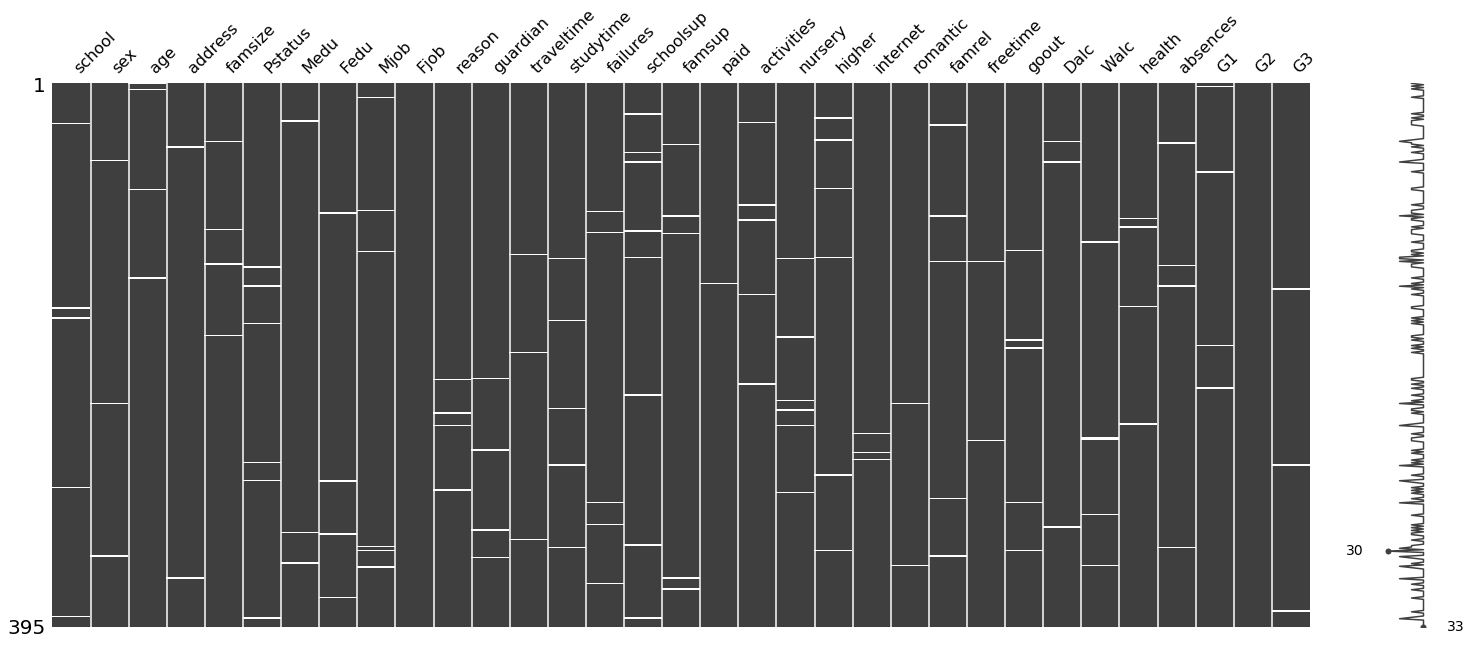

In [172]:
missingno.matrix(df_desafio2)

In [173]:
df_desafio2_dropped = df_desafio2.dropna()

In [174]:
print(f"El porcentaje de datos perdidos si eliminamos todos los N/A es de: {round(len(df_desafio2_dropped)/len(df_desafio2)*100, 2)}%")

El porcentaje de datos perdidos si eliminamos todos los N/A es de: 71.9%


Recodificando columna `age` de `String` a `Float`:

In [176]:
df_desafio2['age'].value_counts()

16    101
17     98
15     82
18     81
19     24
20      3
22      1
21      1
Name: age, dtype: int64

In [177]:
df_desafio2['age'] = df_desafio2['age'].str.replace('\"','')
df_desafio2['age'].value_counts()

16    101
17     98
15     82
18     81
19     24
20      3
22      1
21      1
Name: age, dtype: int64

In [190]:
df_desafio2['age'] = df_desafio2['age'].astype('float')

Recodificando columna `absences` de `String` a `Float`:

In [191]:
df_desafio2['absences'].value_counts(dropna=False)

0.0     113
2.0      64
4.0      53
6.0      31
8.0      22
10.0     17
14.0     12
12.0     11
3.0       8
16.0      7
7.0       7
5.0       5
18.0      5
20.0      4
NaN       4
1.0       3
9.0       3
22.0      3
15.0      3
13.0      3
11.0      3
25.0      1
17.0      1
54.0      1
26.0      1
56.0      1
23.0      1
28.0      1
21.0      1
75.0      1
30.0      1
19.0      1
38.0      1
40.0      1
24.0      1
Name: absences, dtype: int64

In [193]:
df_desafio2['absences'] = df_desafio2['absences'].astype('float')
df_desafio2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
school        390 non-null object
sex           392 non-null object
age           391 non-null float64
address       393 non-null object
famsize       391 non-null object
Pstatus       389 non-null object
Medu          392 non-null object
Fedu          390 non-null object
Mjob          389 non-null object
Fjob          395 non-null object
reason        391 non-null object
guardian      391 non-null object
traveltime    392 non-null object
studytime     390 non-null object
failures      390 non-null object
schoolsup     387 non-null object
famsup        390 non-null object
paid          394 non-null object
activities    390 non-null object
nursery       389 non-null object
higher        389 non-null object
internet      392 non-null object
romantic      393 non-null object
famrel        390 non-null object
freetime      393 non-null object
goout         390 non-null object
Dalc      

Recodificando columna `G1` de `String` a `Float`:

In [195]:
df_desafio2['G1'].value_counts(dropna=False)

10     50
8      41
11     38
7      36
12     35
13     33
9      31
14     30
15     24
6      23
16     22
18      8
17      8
5       7
NaN     4
19      3
4       1
3       1
Name: G1, dtype: int64

In [196]:
df_desafio2['G1'] = df_desafio2['G1'].astype('float')
df_desafio2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
school        390 non-null object
sex           392 non-null object
age           391 non-null float64
address       393 non-null object
famsize       391 non-null object
Pstatus       389 non-null object
Medu          392 non-null object
Fedu          390 non-null object
Mjob          389 non-null object
Fjob          395 non-null object
reason        391 non-null object
guardian      391 non-null object
traveltime    392 non-null object
studytime     390 non-null object
failures      390 non-null object
schoolsup     387 non-null object
famsup        390 non-null object
paid          394 non-null object
activities    390 non-null object
nursery       389 non-null object
higher        389 non-null object
internet      392 non-null object
romantic      393 non-null object
famrel        390 non-null object
freetime      393 non-null object
goout         390 non-null object
Dalc      

Recodificando columna `G2` de `Int` a `Float`:

In [198]:
df_desafio2['G2'] = df_desafio2['G2'].astype('float')
df_desafio2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
school        390 non-null object
sex           392 non-null object
age           391 non-null float64
address       393 non-null object
famsize       391 non-null object
Pstatus       389 non-null object
Medu          392 non-null object
Fedu          390 non-null object
Mjob          389 non-null object
Fjob          395 non-null object
reason        391 non-null object
guardian      391 non-null object
traveltime    392 non-null object
studytime     390 non-null object
failures      390 non-null object
schoolsup     387 non-null object
famsup        390 non-null object
paid          394 non-null object
activities    390 non-null object
nursery       389 non-null object
higher        389 non-null object
internet      392 non-null object
romantic      393 non-null object
famrel        390 non-null object
freetime      393 non-null object
goout         390 non-null object
Dalc      

Recodificando columna `G3` de `String` a `Float`:

In [199]:
df_desafio2['G3'] = df_desafio2['G3'].astype('float')
df_desafio2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
school        390 non-null object
sex           392 non-null object
age           391 non-null float64
address       393 non-null object
famsize       391 non-null object
Pstatus       389 non-null object
Medu          392 non-null object
Fedu          390 non-null object
Mjob          389 non-null object
Fjob          395 non-null object
reason        391 non-null object
guardian      391 non-null object
traveltime    392 non-null object
studytime     390 non-null object
failures      390 non-null object
schoolsup     387 non-null object
famsup        390 non-null object
paid          394 non-null object
activities    390 non-null object
nursery       389 non-null object
higher        389 non-null object
internet      392 non-null object
romantic      393 non-null object
famrel        390 non-null object
freetime      393 non-null object
goout         390 non-null object
Dalc      

* Para simplficar el análisis y su posterior inclusión en un modelo predictivo, se sugiere recodificarlas variables binarias como 0 y 1. Se recomienda seguir en criterio de asignarle 1 a aquellas categorías minoritarias.

Reemplazamos las variables  binarias ('school', 'sex', 'address', 'famsize', 'Pstatus', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic')

In [214]:
print(df_desafio2['school'].value_counts())
school_value_counts = df_desafio2['school'].value_counts()
max_schools_count = school_value_counts.max()
print(max_schools_count)
mayor_school = school_value_counts[school_value_counts == max_school].index[0]
print(mayor_school)
df_desafio2['b_school'] = np.where(df_desafio2['school'] == mayor_school, 0, 1)
df_desafio2['b_school'].value_counts()

GP    345
MS     45
Name: school, dtype: int64
345
GP


0    345
1     50
Name: b_school, dtype: int64

## TODO: Definir funcion para binarizar columnas

# POR REVISAR

In [31]:

#siguiendo la recomendación del criterio de asignar 1 a las categorías minoritarias
df_desafio2['b_school'] = np.where(df_desafio2['school'] == 'MS', 1, 0)
df_desafio2['b_sex'] = np.where(df_desafio2['sex'] == 'M', 1, 0)
df_desafio2['b_address'] = np.where(df_desafio2['address'] == 'R', 1, 0)
df_desafio2['b_famsize'] = np.where(df_desafio2['famsize'] == 'LE3', 1, 0)
df_desafio2['b_Pstatus'] = np.where(df_desafio2['Pstatus'] == 'A', 1, 0)
df_desafio2['b_schoolsup'] = np.where(df_desafio2['schoolsup'] == 'yes', 1, 0)
df_desafio2['b_famsup'] = np.where(df_desafio2['famsup'] == 'no', 1, 0)
df_desafio2['b_paid'] = np.where(df_desafio2['paid'] == 'yes', 1, 0)
df_desafio2['b_activities'] = np.where(df_desafio2['activities'] == 'no', 1, 0)
df_desafio2['b_nursery'] = np.where(df_desafio2['nursery'] == 'no', 1, 0)
df_desafio2['b_higher'] = np.where(df_desafio2['higher'] == 'no', 1, 0)
df_desafio2['b_internet'] = np.where(df_desafio2['internet'] == 'no', 1, 0)
df_desafio2['b_romantic'] = np.where(df_desafio2['romantic'] == 'yes', 1, 0)

#observamos el resultado
df_desafio2.sample(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,b_famsize,b_Pstatus,b_schoolsup,b_famsup,b_paid,b_activities,b_nursery,b_higher,b_internet,b_romantic
390,MS,M,"""20""",U,LE3,A,2,2,services,services,...,1,1,0,0,1,1,0,0,1,0
342,GP,M,"""18""",U,LE3,T,3,4,services,other,...,1,0,0,1,0,0,0,0,0,1
198,GP,F,"""17""",U,GT3,T,4,4,services,teacher,...,0,0,0,0,0,1,0,0,0,0
173,GP,F,"""16""",U,GT3,T,1,3,at_home,services,...,0,0,0,1,0,0,1,0,0,1
135,GP,F,"""15""",U,GT3,T,4,4,services,at_home,...,0,0,0,0,0,0,0,0,0,1


* El procedimiento también debe aplicarse para aquelas variables nominales con más de 2 categorías siguiendo la misma lógica.

In [32]:
#reemplazamos las variables categoricas('Mjob', 'Fjob', 'reason', 'guardian')
#siguiendo la recomendación los valores más altos son los que tienen una menor frecuencia
#los valores 'Nan' son reemplazados por el número 9
df_desafio2['d_Mjob'] = df_desafio2['Mjob'].replace(['other', 'services', 'at_home', 'teacher', 'health', 'Nan'],
                                                  [0, 1, 2, 3, 4, 9])
df_desafio2['d_Fjob'] = df_desafio2['Fjob'].replace(['other', 'services', 'teacher', 'at_home', 'health'],
                                                    [0, 1, 2, 3, 4])
df_desafio2['d_reason'] = df_desafio2['reason'].replace(['course', 'home', 'reputation', 'other', 'Nan'], 
                                                        [0, 1, 2, 3, 9])
df_desafio2['d_guardian'] = df_desafio2['guardian'].replace(['mother', 'father', 'other', 'Nan'],
                                                            [0, 1, 2, 9])
df_desafio2.sample(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,b_paid,b_activities,b_nursery,b_higher,b_internet,b_romantic,d_Mjob,d_Fjob,d_reason,d_guardian
45,GP,F,"""15""",U,LE3,A,4,3,other,other,...,1,0,0,0,0,1,0,0,0,0
289,GP,M,"""18""",U,LE3,A,4,NaN,teacher,teacher,...,1,0,0,0,0,0,3,2,2,0
355,MS,F,"""18""",U,GT3,T,3,3,services,services,...,0,1,0,0,1,1,1,1,0,1
53,GP,F,"""15""",U,GT3,T,4,4,services,services,...,1,1,0,0,0,0,1,1,0,0
67,GP,F,"""16""",U,GT3,T,3,1,services,other,...,1,1,0,0,0,0,1,0,0,0


In [33]:
df_desafio2['d_guardian'].value_counts()

0    270
1     89
2     32
Name: d_guardian, dtype: int64

In [34]:
df_desafio2['Fjob'].isna().sum()

0